In [1]:
from tokeniser import Tokeniser
from load_text import load_prideandprejudice, load_warandpeace
import os

/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-05-17 16:10:44.532561: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-17 16:10:44.556998: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-17 16:10:45.022010: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorR

# Create tokens

In [2]:
vocab_size = 2000 #Size of the vocabulary
vec_dim = 300
window_size = 8
epochs = 5
text_length = 100000
dataset = "prideandprejudice"

  0% (0 of 1897) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--
  0% (6 of 1897) |                       | Elapsed Time: 0:00:00 ETA:   0:00:33


Loading tokeniser from 'vocab_2000_prideandprejudice.json'...


  0% (13 of 1897) |                      | Elapsed Time: 0:00:00 ETA:   0:00:30
  1% (22 of 1897) |                      | Elapsed Time: 0:00:00 ETA:   0:00:27
  1% (31 of 1897) |                      | Elapsed Time: 0:00:00 ETA:   0:00:25
  2% (41 of 1897) |                      | Elapsed Time: 0:00:00 ETA:   0:00:24
  2% (49 of 1897) |                      | Elapsed Time: 0:00:00 ETA:   0:00:22
  3% (62 of 1897) |                      | Elapsed Time: 0:00:00 ETA:   0:00:20
  3% (73 of 1897) |                      | Elapsed Time: 0:00:00 ETA:   0:00:19
  4% (86 of 1897) |                      | Elapsed Time: 0:00:00 ETA:   0:00:18
  5% (97 of 1897) |#                     | Elapsed Time: 0:00:00 ETA:   0:00:18
  5% (111 of 1897) |#                    | Elapsed Time: 0:00:01 ETA:   0:00:17
  6% (121 of 1897) |#                    | Elapsed Time: 0:00:01 ETA:   0:00:16
  7% (137 of 1897) |#                    | Elapsed Time: 0:00:01 ETA:   0:00:16
  8% (155 of 1897) |#                   

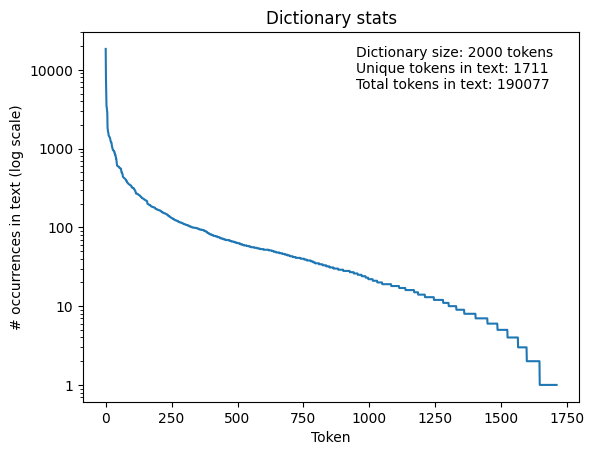

In [3]:
# Load text
filename = f'vocab_{str(vocab_size)}_{str(dataset)}.json'
text = load_prideandprejudice(text_length)

# Check if tokeniser has been saved to disk
if os.path.exists(filename):
    # Load tokeniser from disk
    print("Loading tokeniser from '%s'..." % (filename))
    tokeniser = Tokeniser.load(filename)
else:
    # Create a new tokeniser, train it on the text and save it to disk
    tokeniser = Tokeniser(vocab_size=vocab_size)
    print("Building BPE tokeniser...")
    tokeniser.train(text, verbose=True)
    print("Saving tokeniser to '%s'..." % (filename))
    tokeniser.save(filename)

ids = tokeniser.encode(text, verbose=True)
tokeniser.plot(ids=ids)


# CBOW

### Get Embeddings and save them to file

In [4]:
from tok2vec import tok2Vec
# x = model.get_embeddings()
w, history = tok2Vec(vocab_size, ids, window_size, vec_dim, epochs)

2024-05-17 16:10:54.247302: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-17 16:10:54.267825: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-17 16:10:54.267926: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               600000    
                                                                 
 dense_1 (Dense)             (None, 2000)              600000    
                                                                 
Total params: 1200000 (4.58 MB)
Trainable params: 1200000 (4.58 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5


L355
2024-05-17 16:10:54.269035: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-17 16:10:54.269080: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-17 16:10:54.315769: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#

  66/5345 [..............................] - ETA: 10s - loss: 7.0453 - accuracy: 0.0791      

I0000 00:00:1715919059.319182  643864 service.cc:145] XLA service 0x72ede9165330 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1715919059.319205  643864 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 4080, Compute Capability 8.9
2024-05-17 16:10:59.322534: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-17 16:10:59.330197: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1715919059.358477  643864 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5345/5345 [==============================] - 13s 1ms/step - loss: 4.5045 - accuracy: 0.2729 - val_loss: 3.8755 - val_accuracy: 0.3321
Epoch 2/5
5345/5345 [==============================] - 8s 1ms/step - loss: 3.1940 - accuracy: 0.3982 - val_loss: 3.4820 - val_accuracy: 0.3734
Epoch 3/5
5345/5345 [==============================] - 8s 1ms/step - loss: 2.6218 - accuracy: 0.4621 - val_loss: 3.4240 - val_accuracy: 0.3794
Epoch 4/5
5345/5345 [==============================] - 8s 1ms/step - loss: 2.2750 - accuracy: 0.5081 - val_loss: 3.4547 - val_accuracy: 0.3802
Epoch 5/5
5345/5345 [==============================] - 8s 2ms/step - loss: 2.0237 - accuracy: 0.5461 - val_loss: 3.5292 - val_accuracy: 0.3806
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               600000    
                                                                 
 dense_1 (

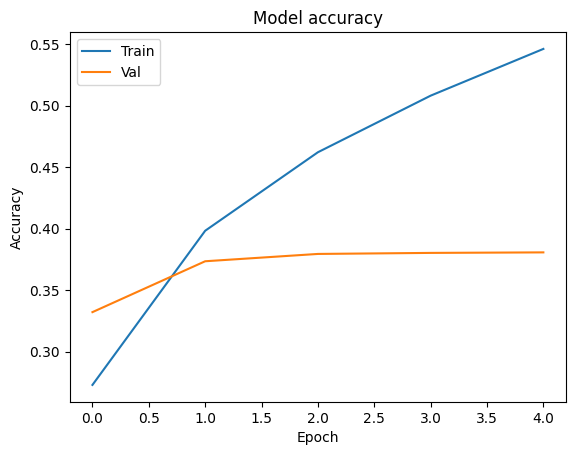

In [5]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

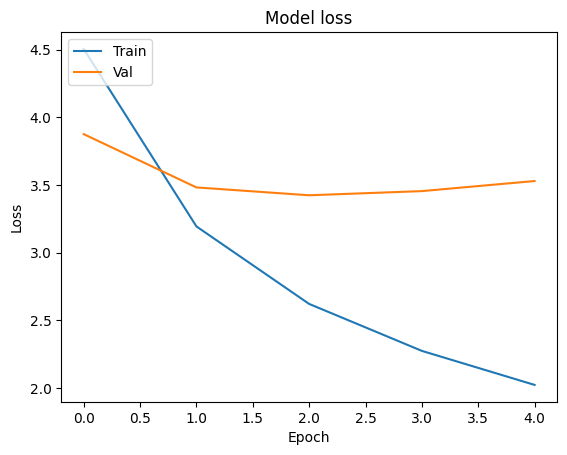

In [6]:
# plot loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Plotting word vectors in 2D using t-SNE...


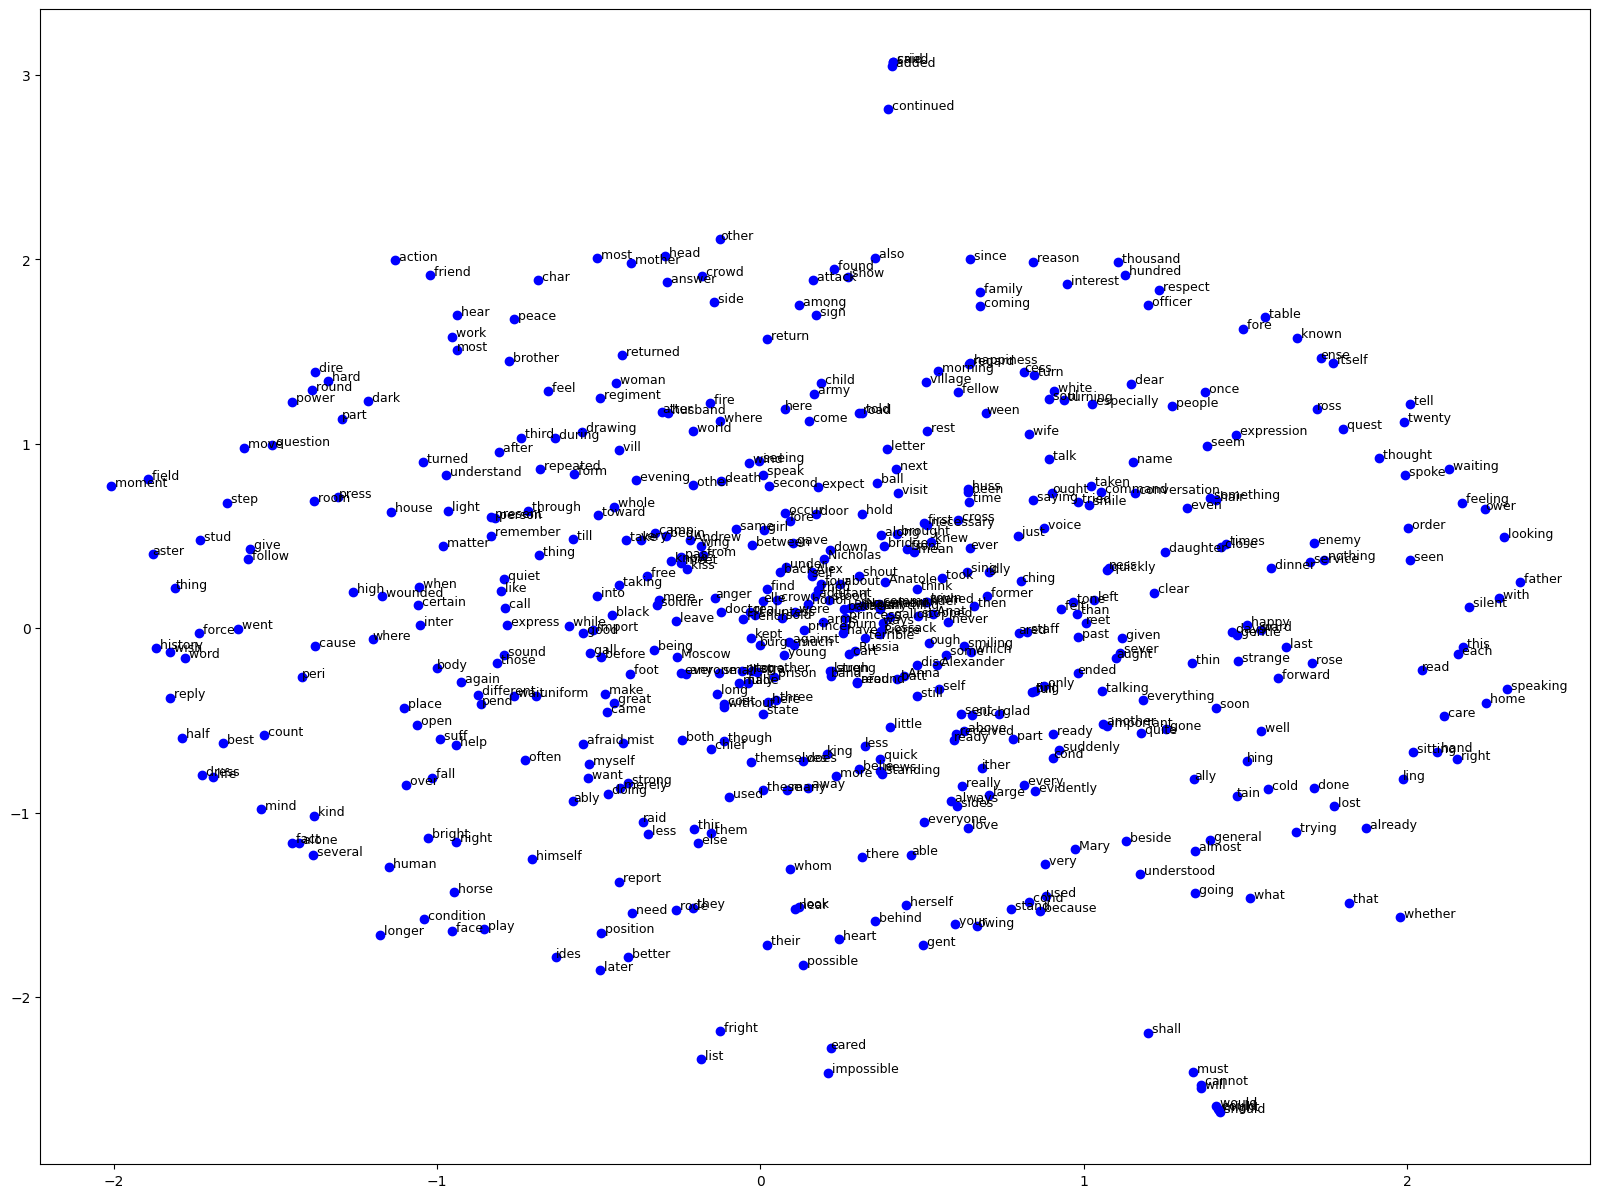

: 

In [7]:
from tokeniser import plot_tok2vec
plot_tok2vec(w, tokeniser.word_index, num_words_to_show=500)